In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simple_exp_smooth(d, extra_periods = 1, alpha=0.4):
    
    # Historical period lenght
    cols = len(d)
    
    #Append np.nan into the demand array to cover future periods
    d =np.append(d, [np.nan]*extra_periods)
    
    # Forecast arry
    f = np.full(cols+extra_periods, np.nan)
    
    # Initialization of first forecast
    f[1] = d[0]
    
    # Create all the t+1 forecast until end of historical period
    for t in range(2, cols+1):
        f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]
        
    # Forecast for all extra periods
    
    for t in range(cols+1, cols+extra_periods):
        
        # Update the forecast as the previous forecast
        f[t] = f[t-1]
        
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast': f, 'Error':d-f})
    
    return df

In [8]:
d = [28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]
df = simple_exp_smooth(d, extra_periods=4)

In [9]:
def kpi(df):
    ''' Calculate BIAS ablolute and scaled
        Calculate MAPE
        MAE absolute and scaled
        RMSE
    '''
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))
    
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs, MAE_rel))
    
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs, RMSE_rel))

In [10]:
kpi(df)

Bias: -1.93, -13.09%
MAPE: 19.64%
MAE: 2.77, 18.82%
RMSE: 3.90, 26.52%


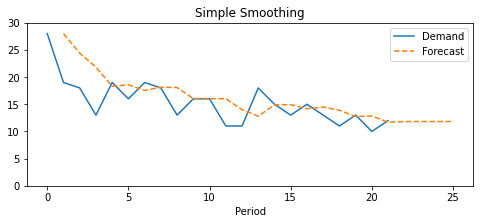

In [12]:
df.index.name = 'Period'
df[['Demand', 'Forecast']].plot(figsize=(8,3), title = 'Simple Smoothing', ylim=(0,30), style = ['-', '--'])